<a href="https://colab.research.google.com/github/nikhomgithub/tfSciPy2018/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)



1.14.0


In [0]:
mnist=keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
train_images=train_images/255.0
test_images=test_images/255.0

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


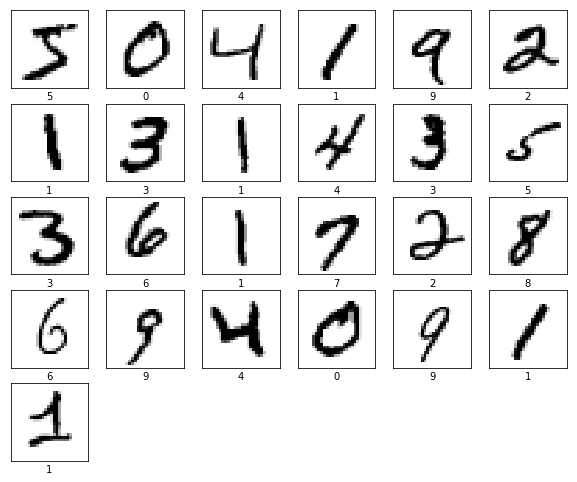

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2274 - acc: 0.9313
Epoch 2/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1006 - acc: 0.9686
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0710 - acc: 0.9777
Epoch 4/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0557 - acc: 0.9828
Epoch 5/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0457 - acc: 0.9853


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 0s 44us/sample - loss: 0.0945 - acc: 0.9742
Test accuracy: 0.9742


In [0]:
predictions = model.predict(test_images)


Text(0.5, 0, '7')

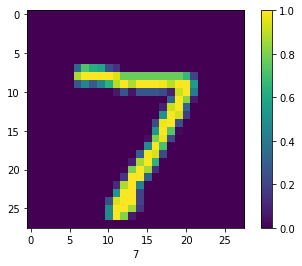

In [14]:
i=0
predictions[i]
plt.figure()
plt.imshow(test_images[i])
plt.colorbar()
plt.gca().grid(False)
plt.xlabel(test_labels[i])

In [0]:
model.save('mnist_model.model')

In [16]:
new_model=tf.keras.models.load_model('mnist_model.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
new_prediction=new_model.predict(test_images)

In [18]:
new_prediction.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])